In [2]:
#Copy the code and change the name for other artists
artist_name = "Kendrick Lamar"

In [3]:
import pandas as pd
import codecs
import json
from pandas.io.json import json_normalize
import re

In [110]:
#Machine learning libraries for Text analysis
import nltk  # machine learning with text
from nltk import download as nltk_download
from nltk.corpus import stopwords, wordnet  # List of common words
from nltk.tokenize import word_tokenize  # Split text into significant forms
from nltk.stem import WordNetLemmatizer  # Reduce words to their root form
from nltk import pos_tag  # Tag words with parts of speech
from collections import defaultdict, Counter  # Dictionaries that have a backup value
from sklearn.feature_extraction.text import CountVectorizer  # Convert text to sparse matrices
from textblob import TextBlob  # Sentiment analysis
from gensim.models.ldamodel import LdaModel  # Topic extraction
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS  # ngrams
from gensim.models.phrases import Phraser  # ngrams
from gensim import corpora, models, similarities  # Vectorization
import pyLDAvis
from wordcloud import WordCloud  # Create wordclouds
import matplotlib.pylab as plt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Run next 2 cells only if you want to pull data from Genius

In [168]:
from lyricsgenius import Genius

genius = Genius('Your genius key', timeout=10)
artist = genius.search_artist(artist_name, max_songs = 300) # use max_songs=10 parameter to limit to 10 songs

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Searching for songs by Kendrick Lamar...

Song 1: "HUMBLE."
Song 2: "​m.A.A.d city"
Song 3: "Swimming Pools (Drank)"
Song 4: "DNA."
Song 5: "Money Trees"
Song 6: "XXX."
Song 7: "Bitch, Don’t Kill My Vibe"
Song 8: "Poetic Justice"
Song 9: "King Kunta"
Song 10: "LOVE."
Song 11: "Backseat Freestyle"
Song 12: "Alright"
Song 13: "The Blacker the Berry"
Song 14: "Sing About Me, I’m Dying of Thirst"
Song 15: "ELEMENT."
Song 16: "LOYALTY."
Song 17: "​i (Album Version)"
Song 18: "A.D.H.D."
Song 19: "FEAR."
Song 20: "Mortal Man"
Song 21: "Wesley’s Theory"
Song 22: "​u"
Song 23: "The Heart Part 4"
Song 24: "PRIDE."
Song 25: "The Art of Peer Pressure"
Song 26: "DUCKWORTH."
Song 27: "Rigamortis"
Song 28: "HiiiPoWeR"
Song 29: "How Much a Dollar Cost"
Song 30: "Black Friday"
Song 31: "These Walls"
Song 32: "Hood Politics"
Song 33: "FEEL."
Song 34: "Sherane a.k.a Master Splinter’s Daughter"
Song 35: "The Recipe"
Song 36: "LUST."
Song 37: "​untitled 02 | 06.23.2014."
Song 38: "YAH."
Song 39: "Bitch, Do

Song 267: "Rip (Remix)"
Song 268: "Prototype"
Song 269: "Fuck A Hook"
Song 270: "Hpnotiq"
Song 271: "Respect The Classic"
Song 272: "Too Cool"
Song 273: "Thank You"
Song 274: "Higher Ground Freestyle"
Song 275: "Regulate (Freestyle)"
Song 276: "Computer Love"
Song 277: "Hovi Baby"
Song 278: "Imma G"
Song 279: "Track 12"
Song 280: "Freestyle vs Fan (On Rigamortis Beat)"
Song 281: "Look Over Your Shoulder (Demo)"
Song 282: "Man of the Hour"
Song 283: "Reebok Presents: I Am"
Song 284: "How We Do"
Song 285: "Get Throwed"
Song 286: "Talk To Me*"
Couldn't find the lyrics section. Please report this if the song has lyrics.
Song URL: https://genius.com/Terrace-martin-mortal-man-lyrics
Song 287: "All the Stars (Demo)"
Song 288: "Lunch Table (L.A. Leakers Freestyle)"
Song 289: "Sway in the Morning (Freestyle) Part 2"
Song 290: "Lyrics Contest Answers (untitled unmastered.)"
Song 291: "On My Momma"
Song 292: "Real One"
Song 293: "Butterfly"
Song 294: "Best Rap Album Acceptance Speech 2018 Grammys

In [169]:
artist_json = artist.save_lyrics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Lyrics_KendrickLamar.json already exists. Overwrite?
(y/n): y
Wrote Lyrics_KendrickLamar.json.


# Start here to use the data from the file on disk

In [284]:
#load the file
name_string = artist_name.replace(' ', '')
lyricsFile = "Lyrics_"+str(name_string)+".json"
with open(lyricsFile) as json_data:
    data = json.load(json_data)

# convert to dataframe
df = pd.DataFrame(data['songs'])
artist_df = df[['full_title', 'title', 'artist', 'lyrics', 'featured_artists', 'release_date']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Lyric Analysis

## Cleaning the lyrics

In [285]:
# convert everything to lower case
artist_df.lyrics = artist_df.lyrics.str.lower()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [286]:
# Remove quotes
artist_df.lyrics = artist_df.lyrics.replace(to_replace="(\u2019)", value="'", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [287]:
# convert common contractions to the full word or phrase
artist_df.lyrics = artist_df.lyrics.replace(to_replace="won’t", value="will not", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="can’t", value="can not", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="wanna", value="want to", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="ain't", value="aint", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="gotta", value="got to", regex=True)
#artist_df.lyrics = artist_df.lyrics.replace(to_replace="n't", value=" not", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="'ll", value=" will", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="lil'", value="little", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="hol'", value="hold", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [288]:
# convert more common contractions to the full word or phrase
artist_df.lyrics = artist_df.lyrics.replace(to_replace="it's", value="it is", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="i've", value="i have", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="i'm", value="i am", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="n' ", value="ng ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="'n ", value="ing ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=" 'em ", value="them ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="&", value="and", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [289]:
# Remove common interjections, or singing sounds
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"[A|a]ah|[A|a]agh|[A|a]yy|[O|o]oh", value="", regex=True) 
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"[H|h]mm|[M|m]mm|[B|b]rr", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"[Y|y]eah", value="", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [290]:
# remove verse, chorus, bridge, intro , outro anotations 
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"\[[^]]*\]", value="", regex=True) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [291]:
# get rid of tabs, new line, return symbols and parentheses
artist_df.lyrics = artist_df.lyrics.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=" ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=[r"\(|\)", ""], value=" ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [292]:
# remove any other symbols except letters, numbers and underscore
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"\W", value=" ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [293]:
# Tokenize
artist_df.lyrics = artist_df.lyrics.apply(word_tokenize)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [294]:
stop_words = stopwords.words("english")
artist_df.lyrics = artist_df.lyrics.apply(lambda x: [y for y in x if y not in stop_words])
                                                             # and len(y) > 2])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [295]:
# check our result after cleaning
artist_df.lyrics

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [nobody, pray, day, way, remember, syrup, sand...
1      [pirus, crips, got, along, probably, gun, end,...
2      [pour, drank, head, shot, drank, sit, drank, s...
3      [got, got, got, got, loyalty, got, royalty, in...
4      [uh, niggas, tryna, get, ya, bish, ya, bish, h...
                             ...                        
295    [dropped, 40, glock, 40, hood, discount, acces...
296    [gangsta, gangsta, gangsta, x, 5, kick, kick, ...
297    [heart, belief, becomes, action, distractions,...
298    [name, lucy, kendrick, introduced, kendrick, u...
299    [looking, know, waiting, right, ama, sit, wind...
Name: lyrics, Length: 300, dtype: object

In [296]:
artist_df.lyrics[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['nobody',
 'pray',
 'day',
 'way',
 'remember',
 'syrup',
 'sandwiches',
 'crime',
 'allowances',
 'finesse',
 'nigga',
 'counterfeits',
 'counting',
 'parmesan',
 'accountant',
 'lives',
 'fact',
 'downing',
 'ussé',
 'boo',
 'bae',
 'tastes',
 'like',
 'kool',
 'aid',
 'analysts',
 'girl',
 'buy',
 'ass',
 'world',
 'paystub',
 'pussy',
 'good',
 'sit',
 'taste',
 'bloods',
 'get',
 'way',
 'petty',
 'let',
 'extras',
 'pull',
 'block',
 'break',
 'playing',
 'tetris',
 'pm',
 'pm',
 'funk',
 'piss',
 'per',
 'diem',
 'got',
 'hate',
 'em',
 'funk',
 'quit',
 'bm',
 'still',
 'ride',
 'mercedes',
 'funk',
 'quit',
 'season',
 'still',
 'greatest',
 'funk',
 'left',
 'stroke',
 'went',
 'viral',
 'right',
 'stroke',
 'put',
 'little',
 'baby',
 'spiral',
 'soprano',
 'c',
 'like',
 'keep',
 'high',
 'note',
 'levels',
 'know',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'little',
 'hold',
 'little',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'sit',
 'litt

## Analysis: common 2 and 3 word phrases found in the lyrics

In [297]:
# Divide the lyrics into "sentences" so that the phrases don't straddle songs.   Each song = one sentence
sentences = []
for l in artist_df.lyrics:
    sentences.append(l)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [298]:
# Number of sentences should equal the number of songs
len(sentences)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


300

In [299]:
# check our result on the first sentence
sentences[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['nobody',
 'pray',
 'day',
 'way',
 'remember',
 'syrup',
 'sandwiches',
 'crime',
 'allowances',
 'finesse',
 'nigga',
 'counterfeits',
 'counting',
 'parmesan',
 'accountant',
 'lives',
 'fact',
 'downing',
 'ussé',
 'boo',
 'bae',
 'tastes',
 'like',
 'kool',
 'aid',
 'analysts',
 'girl',
 'buy',
 'ass',
 'world',
 'paystub',
 'pussy',
 'good',
 'sit',
 'taste',
 'bloods',
 'get',
 'way',
 'petty',
 'let',
 'extras',
 'pull',
 'block',
 'break',
 'playing',
 'tetris',
 'pm',
 'pm',
 'funk',
 'piss',
 'per',
 'diem',
 'got',
 'hate',
 'em',
 'funk',
 'quit',
 'bm',
 'still',
 'ride',
 'mercedes',
 'funk',
 'quit',
 'season',
 'still',
 'greatest',
 'funk',
 'left',
 'stroke',
 'went',
 'viral',
 'right',
 'stroke',
 'put',
 'little',
 'baby',
 'spiral',
 'soprano',
 'c',
 'like',
 'keep',
 'high',
 'note',
 'levels',
 'know',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'little',
 'hold',
 'little',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'sit',
 'litt

In [300]:
# Look for frequently used 2 word combinations
from itertools import groupby

# Build the bigram model
bigram = Phrases(sentences)


# Find bigrams in the songs
two_word_phrases = []
i=0
while i < len(sentences): 
    bigrams = bigram[sentences[i]]
    for s in bigrams:
        if len(re.findall('_', s)) > 0:
            two_word_phrases.append(s)
    i = i + 1
two_word_phrases_df = pd.DataFrame(two_word_phrases, columns = ['Phrases'])
test = two_word_phrases_df.groupby(by = "Phrases").size().reset_index(name='counts')
test.sort_values(by = 'counts', ascending = False).head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Phrases,counts
319,k_dot,115
239,gon_na,113
188,feel_like,99
240,gong_alright,79
322,kendrick_lamar,71


In [301]:
# Looking for 3 word combinations 

# Build the trigram models
trigram = Phrases(bigram[sentences])

tri = []

# Construct trigram list looking at all songs
i=0
while i < len(sentences): 
    songtrigram = trigram[bigram[sentences[i]]]
    for s in songtrigram:
        if len(re.findall('_', s)) > 1:
            tri.append(s)
    i = i + 1

tri_df = pd.DataFrame(tri, columns = ['Phrases'])
test_tri = tri_df.groupby(by = "Phrases").size().reset_index(name='counts')
test_tri.sort_values(by = 'counts', ascending = False).head(30)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Phrases,counts
317,ya_bish_ya_bish,27
290,walls_could_talk,25
178,loving_complicated_loving_complicated,23
236,r_p_r_p,17
255,shit_hit_fan,16
109,gong_alright_gong_alright,16
142,hold_hold_hold_hold,15
23,bitch_kill_vibe_bitch,14
114,good_kid_city,13
149,kill_vibe_bitch_kill,13


In [302]:
fourgram = Phrases(trigram[sentences])
four = []

# Construct trigram list looking at all songs
i=0
while i < len(sentences): 
    songtrigram = fourgram[trigram[sentences[i]]]
    for s in songtrigram:
        if len(re.findall('_', s)) > 2:
            four.append(s)
    i = i + 1
    
four_df = pd.DataFrame(four, columns = ['Phrases'])
test_four = four_df.groupby(by = "Phrases").size().reset_index(name='counts')
test_four.sort_values(by = 'counts', ascending = False).head(20)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Phrases,counts
170,ya_bish_ya_bish,27
85,loving_complicated_loving_complicated,23
113,pool_full_liquor_dive,21
120,r_p_r_p,16
50,gong_alright_gong_alright,16
60,hear_feel_gong_alright,16
5,bitch_kill_vibe_bitch,16
65,hold_hold_hold_hold,15
150,trick_kill_vibe_trick,12
154,vibe_bitch_kill_vibe,12


In [303]:
len(set(tri))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


324

In [304]:
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sentences, min_count=5, threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)
phrases_df = pd.DataFrame(columns = ['phrase', 'score'])
phrase_col = []
score_col = []
wordcount_col = []
for phrase, score in phrases.find_phrases(sentences).items():
    phrase_col.append(phrase)
    score_col.append(score)
    wordcount_col.append(len(re.findall('_', phrase)) + 1)   
phrases_df['phrase'] = phrase_col
phrases_df['score'] = score_col
phrases_df['wordcount'] = wordcount_col
phrases_df[phrases_df['wordcount'] > 2].sort_values(by='wordcount', ascending = False).head(50)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,phrase,score,wordcount


In [305]:
from nltk import ngrams
tgs = nltk.ngrams(sentences[0],5)
fdist = nltk.FreqDist(tgs)
d = Counter()
ngrams_df = pd.DataFrame(columns = ['N-gram', 'Count'])
ngrams_col = []
Count_col = []
for k, v in fdist.items():
    d[k] = v
    ngrams_col.append(k)
    Count_col.append(v)
ngrams_df['N-gram'] = ngrams_col
ngrams_df['Count'] = Count_col
ngrams_df.sort_values(by='Count', ascending = False).head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,N-gram,Count
105,"(hold, bitch, sit, hold, hold)",8
85,"(bitch, humble, hold, bitch, sit)",6
86,"(humble, hold, bitch, sit, hold)",6
104,"(hold, hold, bitch, sit, hold)",4
96,"(sit, hold, sit, little, sit)",4
101,"(little, bitch, humble, hold, hold)",4
100,"(sit, little, bitch, humble, hold)",4
99,"(little, sit, little, bitch, humble)",4
98,"(sit, little, sit, little, bitch)",4
97,"(hold, sit, little, sit, little)",4


In [306]:
artist_df.lyrics

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [nobody, pray, day, way, remember, syrup, sand...
1      [pirus, crips, got, along, probably, gun, end,...
2      [pour, drank, head, shot, drank, sit, drank, s...
3      [got, got, got, got, loyalty, got, royalty, in...
4      [uh, niggas, tryna, get, ya, bish, ya, bish, h...
                             ...                        
295    [dropped, 40, glock, 40, hood, discount, acces...
296    [gangsta, gangsta, gangsta, x, 5, kick, kick, ...
297    [heart, belief, becomes, action, distractions,...
298    [name, lucy, kendrick, introduced, kendrick, u...
299    [looking, know, waiting, right, ama, sit, wind...
Name: lyrics, Length: 300, dtype: object

In [307]:
stop_words = stopwords.words("english")
artist_df.lyrics = artist_df.lyrics.apply(lambda x: [y for y in x if y not in stop_words])
                                                             # and len(y) > 2])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [308]:
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"like[d]*", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"get", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"got", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"know", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"say", value="", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [309]:
artist_df.lyrics[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['nobody',
 'pray',
 'day',
 'way',
 'remember',
 'syrup',
 'sandwiches',
 'crime',
 'allowances',
 'finesse',
 'nigga',
 'counterfeits',
 'counting',
 'parmesan',
 'accountant',
 'lives',
 'fact',
 'downing',
 'ussé',
 'boo',
 'bae',
 'tastes',
 'like',
 'kool',
 'aid',
 'analysts',
 'girl',
 'buy',
 'ass',
 'world',
 'paystub',
 'pussy',
 'good',
 'sit',
 'taste',
 'bloods',
 'get',
 'way',
 'petty',
 'let',
 'extras',
 'pull',
 'block',
 'break',
 'playing',
 'tetris',
 'pm',
 'pm',
 'funk',
 'piss',
 'per',
 'diem',
 'got',
 'hate',
 'em',
 'funk',
 'quit',
 'bm',
 'still',
 'ride',
 'mercedes',
 'funk',
 'quit',
 'season',
 'still',
 'greatest',
 'funk',
 'left',
 'stroke',
 'went',
 'viral',
 'right',
 'stroke',
 'put',
 'little',
 'baby',
 'spiral',
 'soprano',
 'c',
 'like',
 'keep',
 'high',
 'note',
 'levels',
 'know',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'little',
 'hold',
 'little',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'sit',
 'litt

In [310]:
lemma = WordNetLemmatizer()

# Dictionary to convert between part-of-speech tags and the ones the lemmatizer understands

tag_dict = defaultdict(lambda : wordnet.NOUN)
tag_dict['J'] = wordnet.ADJ
tag_dict['V'] = wordnet.VERB
tag_dict['R'] = wordnet.ADV

# function to lemmatize a sentence

def get_lemma(word):
    """Gets the POS tag for a word, and then returns the lemmatized form of the word"""
    tag = pos_tag([word])[0][1][0]
    tag = tag_dict[tag]
    
    return lemma.lemmatize(word, tag)

# Perform the lemmatization
#artist_df.lyrics = artist_df.lyrics.apply(lambda x: [get_lemma(word) for word in x])#
artist_df.lyrics = artist_df.lyrics.apply(lambda x: [get_lemma(word) for word in x])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [319]:
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"like", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"get", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"got", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"know", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"say", value="", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [320]:
artist_df.lyrics[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['nobody',
 'pray',
 'day',
 'way',
 'remember',
 'syrup',
 'sandwich',
 'crime',
 'allowance',
 'finesse',
 'nigga',
 'counterfeit',
 'counting',
 'parmesan',
 'accountant',
 'life',
 'fact',
 'down',
 'ussé',
 'boo',
 'bae',
 'taste',
 'like',
 'kool',
 'aid',
 'analyst',
 'girl',
 'buy',
 'as',
 'world',
 'paystub',
 'pussy',
 'good',
 'sit',
 'taste',
 'blood',
 'get',
 'way',
 'petty',
 'let',
 'extra',
 'pull',
 'block',
 'break',
 'play',
 'tetri',
 'pm',
 'pm',
 'funk',
 'piss',
 'per',
 'diem',
 'get',
 'hate',
 'em',
 'funk',
 'quit',
 'bm',
 'still',
 'ride',
 'mercedes',
 'funk',
 'quit',
 'season',
 'still',
 'great',
 'funk',
 'left',
 'stroke',
 'go',
 'viral',
 'right',
 'stroke',
 'put',
 'little',
 'baby',
 'spiral',
 'soprano',
 'c',
 'like',
 'keep',
 'high',
 'note',
 'level',
 'know',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'little',
 'hold',
 'little',
 'bitch',
 'humble',
 'hold',
 'bitch',
 'sit',
 'hold',
 'sit',
 'little',
 'sit',
 'little',

In [314]:
# Create the list of words and their frequency (corpus)
from gensim import corpora
pyLDAvis.enable_notebook()
#dictionary = corpora.Dictionary(artist_df.lyrics )
dictionary = corpora.Dictionary(artist_df.lyrics)
corpus = [dictionary.doc2bow(text) for text in artist_df.lyrics ]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [315]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.019*"like" + 0.018*"get" + 0.007*"go" + 0.007*"know" + 0.007*"nigga" + 0.007*"say" + 0.007*"make" + 0.006*"see" + 0.005*"aint" + 0.005*"cause"')
(1, '0.022*"get" + 0.016*"nigga" + 0.016*"like" + 0.012*"know" + 0.011*"fuck" + 0.010*"bitch" + 0.009*"say" + 0.008*"go" + 0.007*"want" + 0.007*"shit"')
(2, '0.018*"get" + 0.013*"like" + 0.013*"love" + 0.010*"want" + 0.009*"nigga" + 0.009*"know" + 0.009*"say" + 0.008*"feel" + 0.008*"look" + 0.007*"one"')


In [276]:
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [277]:
dictionary

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [278]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

#sentences = Text8Corpus(datapath('testcorpus.txt'))
artist_df.lyrics1 = [wd for wd in artist_df.lyrics]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(artist_df.lyrics1, min_count=3, threshold=10)

# Construct bigram
print(bigram[artist_df.lyrics[0]])

['nobody_pray', 'day', 'way', 'remember', 'syrup', 'sandwich', 'crime', 'allowance', 'finesse', 'nigga', 'counterfeit', 'counting', 'parmesan', 'accountant', 'life', 'fact', 'down', 'ussé', 'boo', 'bae', 'taste', 'like', 'kool_aid', 'analyst', 'girl', 'buy', 'as', 'world', 'paystub', 'pussy', 'good', 'sit', 'taste', 'blood', 'get', 'way', 'petty', 'let', 'extra', 'pull', 'block', 'break', 'play', 'tetri', 'pm', 'pm', 'funk', 'piss', 'per', 'diem', 'get', 'hate', 'em', 'funk_quit', 'bm', 'still', 'ride', 'mercedes', 'funk_quit', 'season', 'still', 'great', 'funk', 'left_stroke', 'go', 'viral', 'right_stroke', 'put', 'little', 'baby', 'spiral', 'soprano', 'c', 'like', 'keep', 'high_note', 'level', 'know', 'bitch_humble', 'hold', 'bitch_sit', 'hold_little', 'hold_little', 'bitch_humble', 'hold', 'bitch_sit', 'hold_sit', 'little', 'sit_little', 'bitch_humble', 'hold_hold', 'bitch_sit', 'hold_hold', 'little_bitch', 'humble_little', 'bitch', 'hold', 'bitch_sit', 'hold_hold', 'hold_hold', 'hu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-278-00f6d1d42edf>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  artist_df.lyrics1 = [wd for wd in artist_df.lyrics]


# Wordcloud

In [279]:
artist_df.lyrics = artist_df.lyrics.apply(lambda x: " ".join(x))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [280]:
artist_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_title,title,artist,lyrics,featured_artists,release_date
0,HUMBLE. by Kendrick Lamar,HUMBLE.,Kendrick Lamar,nobody pray day way remember syrup sandwich cr...,[],2017-03-30
1,​m.A.A.d city by Kendrick Lamar (Ft. MC Eiht),​m.A.A.d city,Kendrick Lamar,pirus crips get along probably gun end song se...,"[{'api_path': '/artists/4637', 'header_image_u...",2012-10-22
2,Swimming Pools (Drank) by Kendrick Lamar,Swimming Pools (Drank),Kendrick Lamar,pour drank head shot drank sit drank stand dra...,[],2012-07-31
3,DNA. by Kendrick Lamar,DNA.,Kendrick Lamar,get get get get loyalty get royalty inside dna...,[],2017-04-14
4,Money Trees by Kendrick Lamar (Ft. Jay Rock),Money Trees,Kendrick Lamar,uh nigga tryna get ya bish ya bish hit house l...,"[{'api_path': '/artists/1403', 'header_image_u...",2012-10-22


In [281]:
# Create an object that converts strings into a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features= 20000 , min_df=0.01, ngram_range= (1,1))

# Convert the text column to a sparse matrix

data_dtm = vectorizer.fit_transform(artist_df.lyrics)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [282]:
# Create a dataframe of terms and frequencies
# Get the frequency of each term

term_frequencies = data_dtm.sum(axis=0)

# Match frequencies to terms

frequent_terms = [(word, term_frequencies[0, id]) for word, id in vectorizer.vocabulary_.items()]

# Convert the word-frequency pairings to a dataframe

term_df = pd.DataFrame(columns=["term","frequency"], data=frequent_terms)

# Sort the dataframe

term_df.sort_values(by="frequency", ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


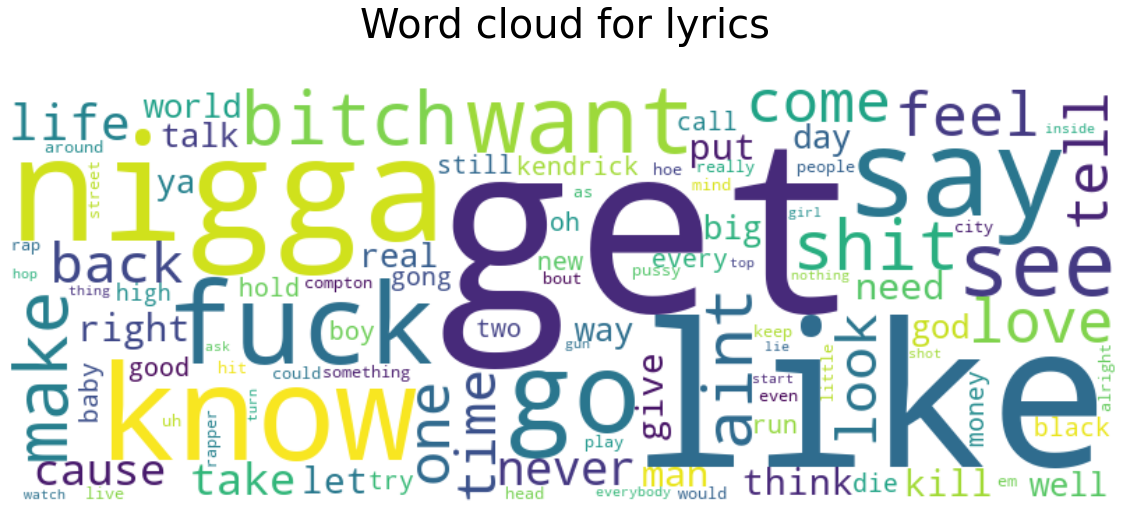

In [283]:
# Create a dictionary of most frequent terms ((required for word clouds)

term_dict = term_df.set_index('term')['frequency'].to_dict()

# Create a wordcloud of most frequent terms

wc = WordCloud(width=800, height=300, background_color="white",
               max_words=100)

wc.generate_from_frequencies(term_dict)

# Display the cloud

plt.figure(figsize=(20, 10))
plt.title("Word cloud for lyrics", fontsize = 40, pad = 50 )
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment

In [233]:
# Assign sentiment to each lyric
artist_df["sentiment"] = artist_df.lyrics.apply(lambda x: TextBlob(x).sentiment.polarity)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-233-d312c35c4e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df["sentiment"] = artist_df.lyrics.apply(lambda x: TextBlob(x).sentiment.polarity)


In [234]:
artist_df.sort_values(by="sentiment", ascending=False).head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_title,title,artist,lyrics,featured_artists,release_date,sentiment
9,LOVE. by Kendrick Lamar (Ft. Zacari),LOVE.,Kendrick Lamar,damn love lust damn u give run money nobody on...,"[{'api_path': '/artists/526832', 'header_image...",2017-04-14,0.357727
247,I'm Da Man by Kendrick Lamar,I’m Da Man,Kendrick Lamar,see man tellthem roger get bitch shatter glass...,[],None,0.342187
65,Poe Man's Dreams (His Vice) by Kendrick Lamar ...,Poe Man’s Dreams (His Vice),Kendrick Lamar,smoke good eat good live good smoke good eat g...,"[{'api_path': '/artists/343', 'header_image_ur...",2011-07-02,0.327244
62,Opposites Attract (Tomorrow W/O Her) by Kendri...,Opposites Attract (Tomorrow W/O Her),Kendrick Lamar,hurt people love u love people hurt u hurt peo...,"[{'api_path': '/artists/2554', 'header_image_u...",2010-09-14,0.302083
270,Respect The Classic by Kendrick Lamar,Respect The Classic,Kendrick Lamar,pimp pimp hooray pimp pimp hooray hooray pimp ...,[],2016-08-08,0.300860
228,Comments on 2014 Grammys by Kendrick Lamar,Comments on 2014 Grammys,Kendrick Lamar,macklemore win best rap album well deserve man...,[],None,0.300000
140,Prayer by Kendrick Lamar,Prayer,Kendrick Lamar,born february 24th 1970 day deliver say would ...,[],None,0.297181
136,Determined by Kendrick Lamar (Ft. Ash Riser),Determined,Kendrick Lamar,want describe discovery simplest term possible...,"[{'api_path': '/artists/12414', 'header_image_...",2009-12-31,0.292234
287,Lunch Table (L.A. Leakers Freestyle) by Kendri...,Lunch Table (L.A. Leakers Freestyle),Kendrick Lamar,cool thirty two shot clip thirty four little n...,[],2014-09-24,0.289158
190,Hub City's Wild Side by Kendrick Lamar,Hub City’s Wild Side,Kendrick Lamar,welcome wild side hub city wild side tec fly h...,[],None,0.276298
